# Collocation and concepts

* Distributional semantics
* Concepts on a social level

* Koselleck
* social vs individual concepts
* expressions

In [66]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.text as dh
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle
import pandas as pd
import networkx as nx
import wordgraph as wg
import dhlab.ngram as ng

In [207]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += ', '.join(categories['propr'])
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Keyword

Comparison

In [49]:
reference = nb.frame(nb.totals(250000), 'freq')

In [11]:
keyword = 'abort'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Graph structure topos

In [32]:
keyword_graph = wg.word_graph(keyword, cutoff=24)

In [33]:
comm = gnl.community_dict(keyword_graph)

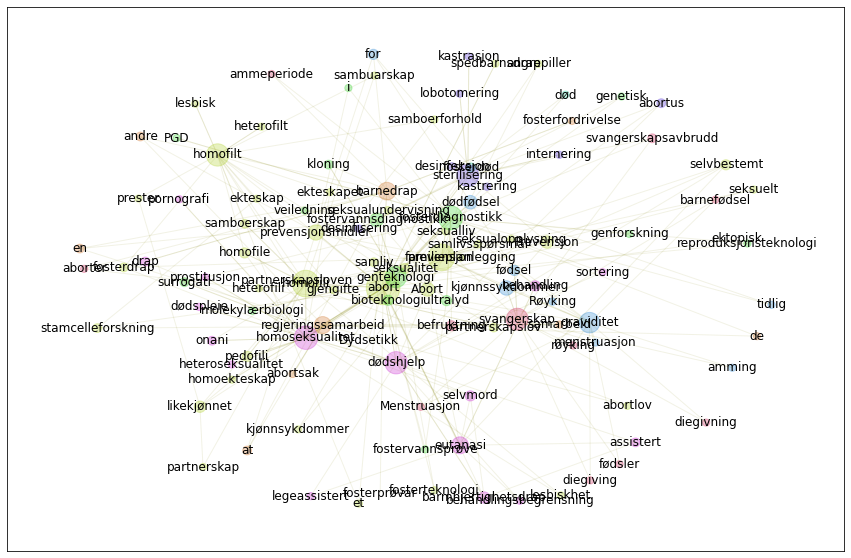

In [34]:
gnl.show_graph(keyword_graph, spread=1.2, fontsize=12)

# Themes or clusters from the graph


In [35]:
pos=""
for x in comm:
    pos += "**" + x + "**\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n\n"
mu.printmd(pos)

**abort-prevensjon**
<span style='font-size:1.1em'>abort, prevensjon, homofili, homofilt, prevensjonsmidler, Abort, Prevensjon, likekjønnet, pedofili, selvbestemt, homofile, seksualitet, samboerskap, samliv, stamcelleforskning, partnerskapslov, fosterdrap, heterofilt, gjengifte, kjønnsykdommer, lesbiskhet, seksualopplysning, seksuelt, partnerskap, homoekteskap, partnerskapsloven, fosterteknologi, lesbisk, seksualundervisning, samlivsspørsmål, abortlov, prester, ekteskap, sambuarskap, angrepiller, heterofili, familieplanlegging, seksualliv, ekteskapet, spedbarnsdrap, et, samboerforhold, Dydsetikk, fosterprøvar, ektopisk</span>

**fosterdiagnostikk-genteknologi**
<span style='font-size:1.1em'>fosterdiagnostikk, genteknologi, fostervannsdiagnostikk, ultralyd, bioteknologi, kloning, surrogati, PGD, molekylærbiologi, veiledning, fostervannsprøve, genetisk, reproduksjonsteknologi, i, genforskning</span>

**fosterdød-død**
<span style='font-size:1.1em'>fosterdød, død</span>

**graviditet-kjønnssykdommer**
<span style='font-size:1.1em'>graviditet, kjønnssykdommer, dødfødsel, fødsel, for, tidlig, Røyking, amming, menstruasjon</span>

**sterilisering-abortus**
<span style='font-size:1.1em'>sterilisering, abortus, lobotomering, desinfisering, kastrering, kastrasjon, desinfeksjon, internering</span>

**homoseksualitet-dødshjelp**
<span style='font-size:1.1em'>homoseksualitet, dødshjelp, eutanasi, barmhjertighetsdrap, selvmord, behandling, onani, assistert, drap, sortering, heteroseksualitet, behandlingsbegrensning, prostitusjon, dødspleie, legeassistert, pornografi</span>

**svangerskap-befruktning**
<span style='font-size:1.1em'>svangerskap, befruktning, svangerskapsavbrudd, diegivning, diegiving, røyking, fødsler, aborter, ammeperiode, barnefødsel, Menstruasjon</span>

**barnedrap-regjeringssamarbeid**
<span style='font-size:1.1em'>barnedrap, regjeringssamarbeid, at, andre, en, de, fosterfordrivelse, samarbeid, abortsak</span>



In [208]:
gnl.show_cliques(keyword_graph)

(3, 1) gjengifte, sambuarskap, samboerskap, homoseksualitet, kjønnsykdommer, homofile, angrepiller, graviditet, seksualitet, homofili, lesbiskhet, sterilisering, partnerskap, Prevensjon, abort, partnerskapsloven, abortus, samboerforhold, partnerskapslov, seksualundervisning, Abort, homofilt, likekjønnet, onani, kjønnssykdommer, pedofili, fosterdrap, prevensjonsmidler, prevensjon

(3, 2) genteknologi, fosterteknologi, Abort, dødshjelp, kloning, fosterdiagnostikk, selvmord, assistert, reproduksjonsteknologi, barmhjertighetsdrap, bioteknologi, fostervannsdiagnostikk, genforskning, abort

(4, 1) homoseksualitet, seksualitet, prevensjon, homofili, abort



# Associations


In [39]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title='plot');

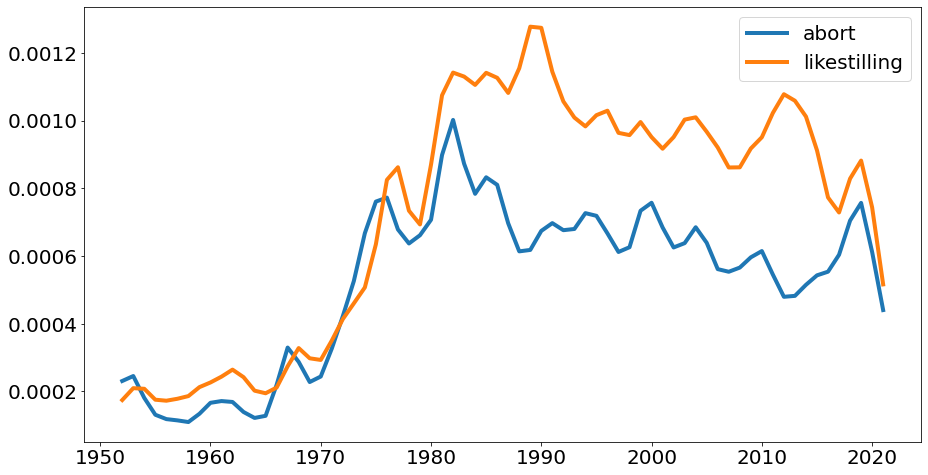

In [235]:
ng.Ngram("abort likestilling".split()).plot(lw = 4, figsize=(15,8))

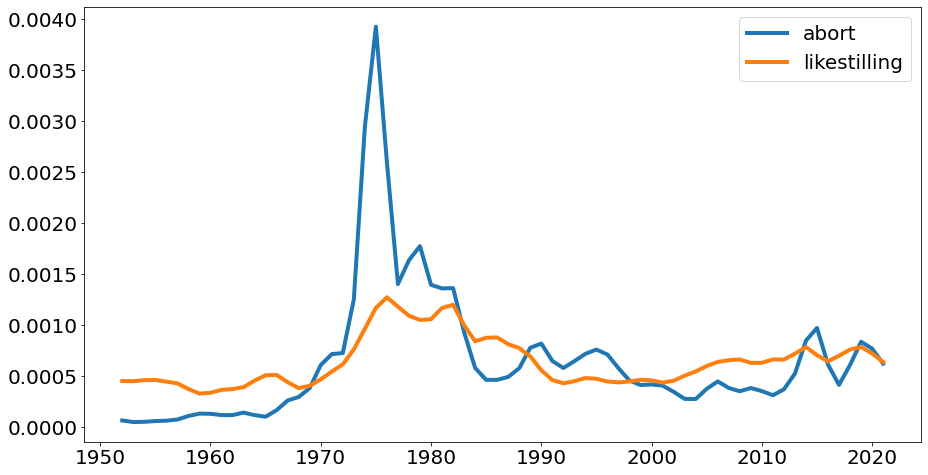

In [236]:
ng.Ngram("abort likestilling".split(), doctype='digavis').plot(lw = 4, figsize=(15,8))

# Create the corpus

In [42]:
step = 5
corpus = {yf: dh.Corpus(doctype="digavis", fulltext=keyword, from_year = yf, to_year = yf + step, limit = 1000) for yf in range(1930, 2000, step)}

In [43]:
corpus[1930].corpus.head(5)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
262,201124019,URN:NBN:no-nb_digavis_nationen_null_null_19310...,nationen,None,None,None,None,Oslo,19310113,1931,None,None,None,None,None,None,digavis
635,201932356,URN:NBN:no-nb_digavis_vestopland_null_null_193...,vestopland,None,None,None,None,Gjøvik,19300722,1930,None,None,None,None,None,None,digavis
631,202030350,URN:NBN:no-nb_digavis_bergensaftenbladbergenat...,bergensaftenbladbergenattenattini,None,None,None,None,Bergen,19341115,1934,None,None,None,None,None,None,digavis
390,200317764,URN:NBN:no-nb_digavis_dagbladet_null_null_1930...,dagbladet,None,None,None,None,Oslo,19300718,1930,None,None,None,None,None,None,digavis
5,200062050,URN:NBN:no-nb_digavis_akershusamtstidende_null...,akershusamtstidende,None,None,None,None,Frogn,19341213,1934,None,None,None,None,None,None,digavis


In [43]:
corpus[1990].corpus.head(5)

,dhlabid,urn,title,authors,oaiid,sesamid,isbn10,city,timestamp,year,publisher,langs,subjects,ddc,genres,literaryform,doctype
262,201124019,URN:NBN:no-nb_digavis_nationen_null_null_19310...,nationen,None,None,None,None,Oslo,19310113,1931,None,None,None,None,None,None,digavis
635,201932356,URN:NBN:no-nb_digavis_vestopland_null_null_193...,vestopland,None,None,None,None,Gjøvik,19300722,1930,None,None,None,None,None,None,digavis
631,202030350,URN:NBN:no-nb_digavis_bergensaftenbladbergenat...,bergensaftenbladbergenattenattini,None,None,None,None,Bergen,19341115,1934,None,None,None,None,None,None,digavis
390,200317764,URN:NBN:no-nb_digavis_dagbladet_null_null_1930...,dagbladet,None,None,None,None,Oslo,19300718,1930,None,None,None,None,None,None,digavis
5,200062050,URN:NBN:no-nb_digavis_akershusamtstidende_null...,akershusamtstidende,None,None,None,None,Frogn,19341213,1934,None,None,None,None,None,None,digavis


In [50]:
from time import time

collocations = dict()
t0 = time()
for year in corpus:
    try:
        collocations[year] = dh.Collocations(corpus[year], words=[keyword], reference=reference, before = 10, after = 10)
    except:
        print("gir opp", i)
    #print(year, (time() - t0)/60, "minutter")

1930 0.027920826276143392 minutter
1935 0.05504873593648275 minutter
1940 0.07517893314361572 minutter
1945 0.10129671096801758 minutter
1950 0.1274659276008606 minutter
1955 0.15409018596013388 minutter
1960 0.17991257111231487 minutter
1965 0.20726530154546102 minutter
1970 0.23825972874959309 minutter
1975 0.2672296325365702 minutter
1980 0.2940990845362345 minutter
1985 0.3238488435745239 minutter
1990 0.35134713649749755 minutter
1995 0.378429106871287 minutter


In [61]:
def sub(c, count_cut = 5, number_cut = 300, relevance_cut = 40):
    return c[c['counts'] > count_cut][c.relevance > relevance_cut].sort_values(by='relevance', ascending=False).head(number_cut)

In [78]:
colls = pd.concat([collocations[x].coll for x in collocations], axis = 1, keys=collocations.keys()).fillna(0)

# Check key words for each period

What do the data points look like?

In [212]:
colls.sort_values(by=(1930, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

In [238]:
colls[[(x,'relevance') for x in collocations]].loc[['kunstig', 'illegal', 'legal','legalisert', 'fri', 'selvbestemt','likestilling']].style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
kunstig,"1,632",873,30,126,164,78,144,55,2,12,23,13,2,10
illegal,0,0,0,294,190,555,119,714,334,75,129,58,113,14
legal,7,12,0,189,472,375,424,390,89,45,21,16,21,12
legalisert,226,"1,271",0,727,0,841,774,"1,125",429,325,93,299,434,0
fri,3,5,0,4,3,2,6,130,151,101,114,45,33,35
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"
likestilling,0,0,0,0,0,0,0,0,11,22,40,10,4,36


In [237]:
colls[[(x,'counts') for x in collocations]].loc[['kunstig', 'illegal', 'legal','legalisert', 'fri', 'selvbestemt', 'likestilling']].style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts,counts
kunstig,688,327,2,33,52,31,53,28,2,7,12,6,1,4
illegal,0,0,0,14,11,40,8,66,54,8,12,5,9,1
legal,2,3,0,32,97,96,101,128,51,17,7,5,6,3
legalisert,2,10,0,4,0,7,6,12,8,4,1,3,4,0
fri,9,16,0,8,8,7,17,543,"1,102",483,479,175,120,111
selvbestemt,0,0,0,0,0,0,0,0,"1,029",763,653,255,180,244
likestilling,0,0,0,0,0,0,0,0,6,8,13,3,1,9


# Check concordance

Digital hermeneutics

In [65]:
dh.Concordance(corpus[1930], "NEAR(abort* kunstig*, 20)").show()

,link,concordance
681,URN:NBN:no-nb_digavis_arbeiderbladetoslo_null_null_19300923_47_260_1,Det foreslåes et tillegg til § 245 således at det blir adgang til kunstig abort ved lægehjelp på sykehus : 1....
486,URN:NBN:no-nb_digavis_norgeskvinner_null_null_19300722_10_58_1,... uttaler lægemøtet som sin opfatning at straffelovens bestemmelser om kunstig abort ikke dekker nutidens rettsopfatning på dette område . Lægemøtet...
132,URN:NBN:no-nb_digavis_ostlendingen_null_null_19300726_31_172_1,"... om at der gis lægene rett til å foreta kunstig abort , ikke bare av medisinske , men jgså av..."
186,URN:NBN:no-nb_digavis_soerlandet_null_null_19321119_26_271_1,"... et senere tidspunkt , betegner vi inngrepet som partus arte præmaturus ( kunstig fortidlig fødsel ) . Abortus provoeatus -..."
150,URN:NBN:no-nb_digavis_fremtiden_null_null_19300818_26_193_1,... De kunstige aborter florerer — synlig for Gud og hvermann — ganske åpent mellem oss . De florerer som en åpenbar hån...
599,URN:NBN:no-nb_digavis_telemarkarbeiderblad_null_null_19300730_9_174_1,"Man vil for det annet anse det heldig å inndele de forhold , hvorunder kunstig abort på ikke-medisinske indikasjoner bør..."
676,URN:NBN:no-nb_digavis_arbeiderbladetoslo_null_null_19300726_47_202_1,a ) For utførelse av kunstig abort må der ikke tas større honorar enn 25 kroner .
562,URN:NBN:no-nb_digavis_tvedestrandogomegnsavis_null_null_19300729_29_59_1,Det skal være koromissionens opgave saavidt mulig at indskrænke utførelsen av kunstig abort . Den skal derfor ha sin .
94,URN:NBN:no-nb_digavis_nationen_null_null_19300711_13_159_1,Derimot har det ikke lykkes komiteen aa komme til enighet om i hvilken utstrekning tilladelsen til utførelse av kunstig abort...
36,URN:NBN:no-nb_digavis_lofotposten_null_null_19341110_35_235_1,"... en mening om hvad som helst — her altså om kunstig abort , fosterdrap — ikke noen som helst forhøiet egenverdi ,..."


In [106]:
dh.Concordance(corpus[1990], "NEAR(abort* kunstig*, 20)").show()

,link,concordance
6,URN:NBN:no-nb_digavis_vaartland_null_null_19940513_50_108_1,"... kombinere kunstig befruktning med sæddonasjon . ¦ Sædgivers anonymitet opprettholdes . ¦ Det bes om en stortingsmelding om praktisering av abortloven ,..."
2,URN:NBN:no-nb_digavis_klassekampen_null_null_19920817_23_188_1,"... Abort er blitt en selvfølge , kunstig inseminasjon en rettighet , genteknologi gjør det mulig å operere syke fostre Øog..."
4,URN:NBN:no-nb_digavis_vaartland_null_null_19920206_48_31_1,... NÅR SAMFUNNET sier at Downs syndrom automatisk er gyldig grunn til provosert abort eller gir grunnlag for kunstig fødsel med...
3,URN:NBN:no-nb_digavis_bergenstidende_null_null_19940301_127_50_1,"... Ein vesentleg del av desse abortane er seinabortar , der fødselen vert sett kunstig i"
1,URN:NBN:no-nb_digavis_romsdalsbudstikke_null_null_19930609_150_128_1,"... Både kvinnen som tar abort for å kvitte seg med et uønsket foster , og kvinnen som lar seg kunstig..."
5,URN:NBN:no-nb_digavis_vaartland_null_null_19920612_48_133_1,"... holdt kunstig i live . I YNGSTE LAGET Birgit Høvik var 13 år i 1978 , da dagens abortlov ble..."
0,URN:NBN:no-nb_digavis_mossavis_null_null_19910529_115_119_1,... Kunstig abort er krig mot barn » . Denne krigen er også i ferd med å ramme de eldre og funksjonshemmede...


# How are contexts distributed?

In [116]:
colls[[(x,'relevance') for x in collocations]].sort_values(by=(1995, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"
AAN,0,0,0,0,0,0,0,0,0,166,950,"5,490","11,307","12,726"
prevensjonsveiledning,0,0,0,0,0,242,0,0,"1,079",818,375,802,219,"5,906"
Lahnstein,0,0,0,0,0,0,0,0,0,498,380,711,222,"3,492"
GRATIS,0,0,0,0,0,0,0,0,0,0,0,0,0,"3,016"
Folkeaksjonen,0,0,0,0,0,0,0,0,"8,759","20,163","6,244",872,792,"2,853"
abortloven,0,569,0,0,805,323,"1,040",839,"1,008","2,768","1,167","1,784","1,265","2,409"
svangerskapsuke,611,0,0,860,0,0,175,0,399,"1,155",315,741,"1,322","2,232"
15.30,0,0,0,0,0,0,0,0,0,0,33,0,38,"1,120"


In [232]:
dh.Concordance(corpus[1990], "NEAR(abort lahnstein, 20)").show()

,link,concordance
4,URN:NBN:no-nb_digavis_agder_null_null_19930903_117_101_1,Som gammel leder av folkebevegelsen mot abort ville det være en enda større historisk innsats om hun ( Lahnstein )...
5,URN:NBN:no-nb_digavis_vaartland_null_null_19930320_49_67_1,... og mener at kvinner ikke kan bestemme abort alene . Anne Enger Lahnstein til Arbeiderbladet Hun er den eneste partileder...
2,URN:NBN:no-nb_digavis_adresseavisen_null_null_19900509_224_105_1,... Anne Enger Lahnstein ( Sp ) til Norpress . Hun var leder for Folkeaksjonen mot fri abort da abortloven ble...
1,URN:NBN:no-nb_digavis_fredriksstadblad_null_null_19940118_106_14_1,... Lahnstein og hele Senterpartiet vil følge opp her hjemme og gå inn i et sterkt engasjement mot fri abort ....
0,URN:NBN:no-nb_digavis_laagendalsposten_null_null_19930902_91_168_1,Som gammel leder av folkebevegelsen mot abort ville det være en enda større historisk innsats om hun ( Lahnstein )...
6,URN:NBN:no-nb_digavis_vaartland_null_null_19940113_50_10_1,... Lahnstein i Senterpartiet . Kypros har utrydda den alvorlege arvelege blodmangelsjuk- dommen middelhavsanemi - mykje med hjelp av abort ....
3,URN:NBN:no-nb_digavis_nationen_null_null_19930317_76_64_1,... til Nationen at han er enig med Lahnstein i synet på selvbestemt abort . - Det må være en fordel...


In [123]:
colls[[(x,'relevance') for x in collocations]].sort_values(by=(1985, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
selvbestemt,0,0,0,0,0,0,0,0,"28,010","31,499","30,851","12,896","9,925","15,143"
AAN,0,0,0,0,0,0,0,0,0,166,950,"5,490","11,307","12,726"
Genteknologi,0,0,0,0,0,0,0,0,0,0,0,"2,558",0,0
Nessa,0,0,0,0,0,0,0,0,0,0,103,"1,922","1,138",607
prevensjonsmiddel,0,0,0,0,0,0,0,0,727,"2,005",688,"1,842","1,339",151
abortloven,0,569,0,0,805,323,"1,040",839,"1,008","2,768","1,167","1,784","1,265","2,409"
Dynastiet,0,0,0,0,0,0,0,0,0,0,0,"1,523",0,0
22.10,0,0,0,0,0,0,0,87,0,0,172,"1,476",0,226
Skippergt,0,0,0,0,0,0,0,0,0,0,0,"1,280",0,0


In [206]:
colls[[(x,'relevance') for x in collocations]].sort_values(by=(1965, 'relevance'), ascending=False).head(20).style.format("{0:,.0f}").background_gradient(axis = 1)

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance,relevance
fødselskontroll,356,0,0,287,709,758,407,"2,217",338,128,440,0,514,193
abortspørsmålet,0,0,0,378,311,0,0,"1,753","1,671","2,366","2,321",828,"1,354",254
programposten,0,0,0,0,0,0,0,"1,656",948,0,0,0,0,180
styringsverk,0,0,0,0,0,0,0,"1,644",0,0,0,0,0,0
22.30,0,0,0,0,0,77,0,"1,432",0,0,415,0,0,0
programfestet,0,0,0,0,0,0,0,"1,269","2,087","1,789","1,890",337,0,207
programpost,0,0,0,0,0,0,0,"1,259",823,78,0,0,0,0
Prevensjon,0,0,0,240,198,318,0,"1,238",283,537,615,0,574,323
legalisert,226,"1,271",0,727,0,841,774,"1,125",429,325,93,299,434,0


# NB ngram

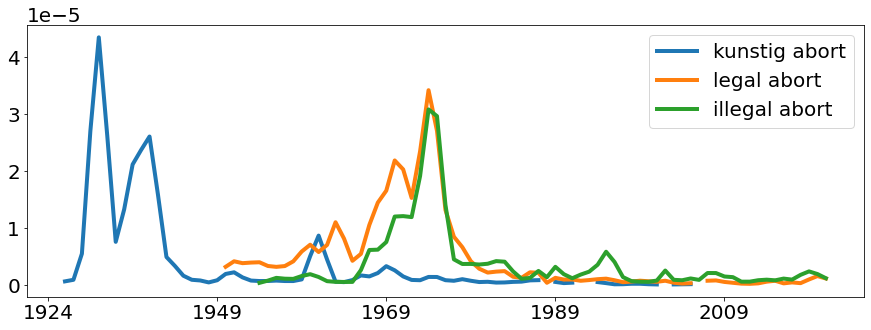

In [122]:
ng.Ngram(["kunstig abort", "legal abort", "illegal abort"],doctype='digavis', from_year = 1920).plot(lw=4, figsize=(15,5))

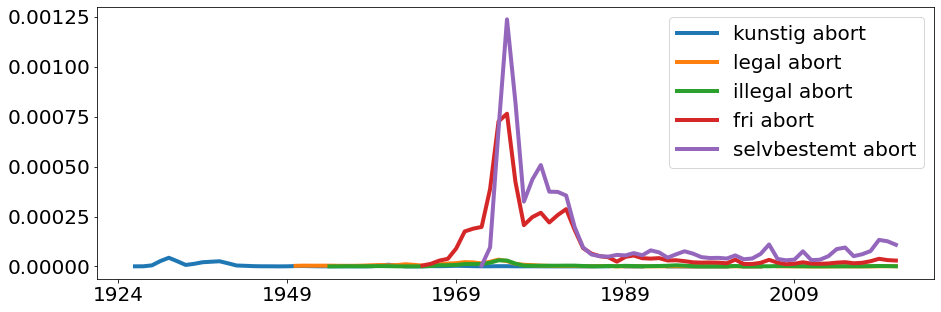

In [213]:
ng.Ngram(["kunstig abort", "legal abort", "illegal abort", "fri abort", "selvbestemt abort"],doctype='digavis', from_year = 1920).plot(lw=4, figsize=(15,5))

In [192]:
def show_matrix(df, column=0, top = 23):
    print(f"showing {df.columns[column]}")
    return df.sort_values(by=pmi.columns[column], ascending=False).head(top).fillna(0).round(0).style.format("{0:,.0f}").background_gradient(axis=0)


In [129]:
sub(collocations[1930].coll).index

Index(['provocatus', 'svangerskapets', 'Lægeforeningen', 'abortus',
       'henstiller', 'barselfeber', 'nutidens', 'preventiver',
       'fosterfordrivelse', 'frigivelse',
       ...
       'straffes', 'ansette', 'samleie', 'handlingen', 'tillått', 'utføre',
       'lovlig', 'sykehus', 'berettiget', 'kvinnens'],
      dtype='object', length=170)

In [130]:
words = [sub(collocations[x].coll).index for x in collocations]

In [132]:
words = [w for wrd in words for w in wrd]

In [172]:
pmi_w = colls[[(x,'relevance') for x in collocations]].loc[words].drop_duplicates()

In [173]:
pmi_w.columns = [x[0] for x in pmi_w.columns]

In [214]:
#pmi_w.sort_values(by=1930)

In [175]:
pmi_dot_year = pmi_w.transpose().dot(pmi_w)

In [176]:
pmi_dot_word = pmi_w.dot(pmi_w.transpose())

In [215]:
#pmi_dot_year.style.background_gradient()

In [216]:
#pmi_dot_word

In [179]:
import pandas as pd

In [217]:
#pmi_dot_word.shape

# Creating graphs from the matrices

In [181]:
graph = nx.from_pandas_adjacency(pmi_dot_year)

In [188]:
graph_word = nx.from_pandas_adjacency(pmi_dot_word)

In [182]:
graph.nodes()

NodeView((1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995))

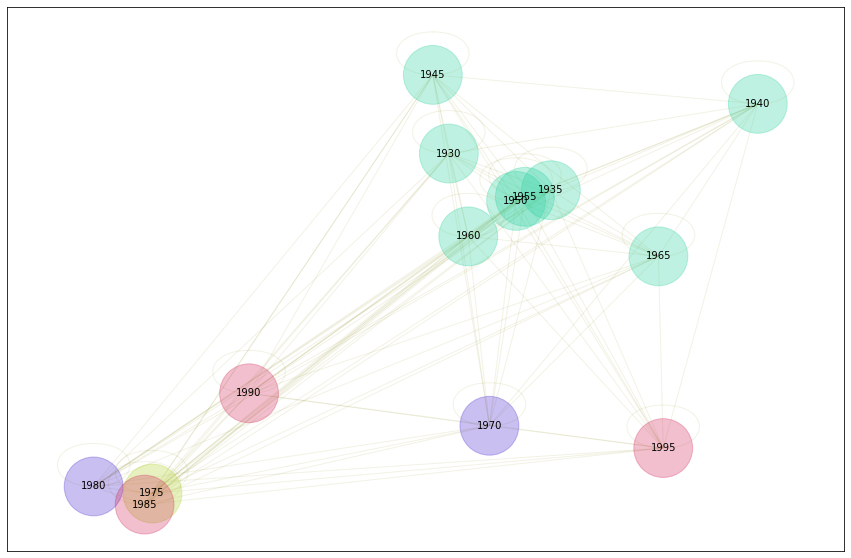

In [183]:
gnl.show_graph(graph)

In [149]:
from collections import Counter
def community_dict(G):
    sorter = Counter(dict(nx.degree(G)))
    cd = {}
    for c in gnl.mcommunity(G):
        l = [(x, sorter[x]) for x in c if sorter[x] > 0]
        # print(l)
        l.sort(key=lambda i: i[1], reverse=True)
        # print(l)
        cd['-'.join([str(x[0]) for x in l[:2]])] = [x[0] for x in l]
    return cd

def show_communities(G):
    Gc = community_dict(G)
    for c, value in Gc.items():
        print(str(c), ': ', ', '.join([str(v) for v in value]))
        print()

# The clustering of years

In [225]:
show_communities(graph)

1975 :  1975

1955-1960 :  1955, 1960, 1930, 1965, 1935, 1940, 1945, 1950

1970-1980 :  1970, 1980

1985-1995 :  1985, 1995, 1990



In [229]:
from collections import Counter
Counter(nx.centrality.degree_centrality(graph_word)).most_common(10)

[('kunstig', 1.001906577693041),
 ('aborter', 1.001906577693041),
 ('abort', 1.001906577693041),
 ('svangerskap', 1.001906577693041),
 ('svangerskapet', 1.001906577693041),
 ('fødsel', 1.001906577693041),
 ('medisinsk', 1.001906577693041),
 ('ender', 1.001906577693041),
 ('forsøk', 1.001906577693041),
 ('midler', 1.001906577693041)]

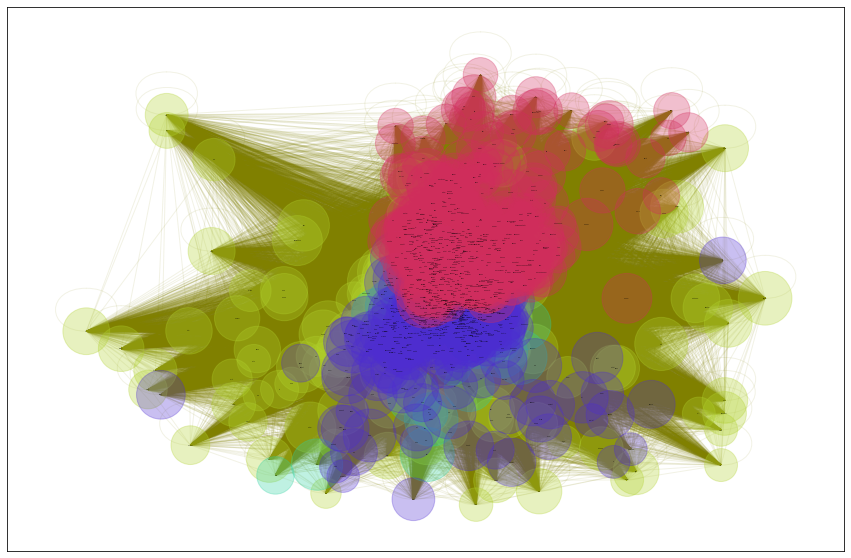

In [230]:
gnl.show_graph(graph_word, fontsize=1)

In [189]:
show_communities(graph_word)

svangerskap-morens :  svangerskap, morens, Kvinnen, svangerskapet, kvinner, føde, Sverige, svenske, ulykkelige, tillate, adgang, foreta, inngrep, medisinske, tillatelse, lovlig, Abort, indikasjoner, leger, sosiale, risiko, legal, voldtekt, ulovlig, sterilitet, straff, Saken, drap, nektet, straffbart, pst., ulovlige, Stockholm, søker, kriminelle, Loven, innvilget, ugifte, fødselskontroll, utfort, inngrepet, metoder, illegale, seksuell, påkjenning, Kvinnene, fremholdt, endte, fosterets, Filmen, blodskam, dødfødt, avbrytes, legene, illegal, forbudet, lovgivningen, forbrytelse, opplyst, overlegen, lovlige, forkastelig, misbrukt, Svensk, tillot, selvmord, spirende, betryggende, dødsstraff, Hittil, Legal, utveien, skyldfølelse, utsetter, opplyste, søknad, landsmøte, rettsstridig, anklaget, fremholder, Legene, opplyser, søknadene, resulterer, overlege, påbegynt, korrespondent, piller, tungtveiende, sjukehus, mors, anbefalt, forårsaket, angrepet, alvorleg, foretrekke, sosialmedisinske, avslått

# Assosiasjoner og variasjon over år.

In [185]:
pmi_w.sort_values(by=pmi_w.columns[0], ascending=False).head(50)
#.fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995
provocatus,8335.609669,7974.431330,5353.612533,2010.848003,3317.028418,3104.580223,1190.203589,518.631214,395.618566,150.001797,343.322277,0.000000,0.000000,0.000000
svangerskapets,3834.774179,634.708492,0.000000,0.000000,1196.854707,0.000000,773.011581,280.699830,428.242888,487.114673,185.817016,298.352344,108.430644,366.130214
Lægeforeningen,3147.843345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,358.544399
abortus,3063.743196,2241.347234,3935.427550,985.446317,1625.559681,489.036294,349.966305,381.244544,436.227368,110.265956,0.000000,0.000000,147.269742,0.000000
henstiller,2674.249220,0.000000,0.000000,0.000000,0.000000,0.000000,210.672451,0.000000,21.883318,33.188908,0.000000,0.000000,0.000000,0.000000
barselfeber,2375.656609,0.000000,0.000000,173.664720,286.471583,114.910167,0.000000,89.582051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nutidens,2330.363439,55.217085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
preventiver,2277.715281,0.000000,0.000000,732.622153,302.127323,484.760142,520.359280,566.866391,648.619470,0.000000,375.252886,0.000000,218.973014,0.000000
fosterfordrivelse,2174.025663,2691.539629,2792.571029,699.270613,0.000000,0.000000,0.000000,0.000000,309.546014,0.000000,179.085027,191.695531,0.000000,0.000000
frigivelse,1862.227621,369.869504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.995199,0.000000,0.000000,0.000000,0.000000,0.000000


In [195]:
def freq_assoc_val(agg, pmi, col, rot = 40):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=rot, figsize=(12, 8))

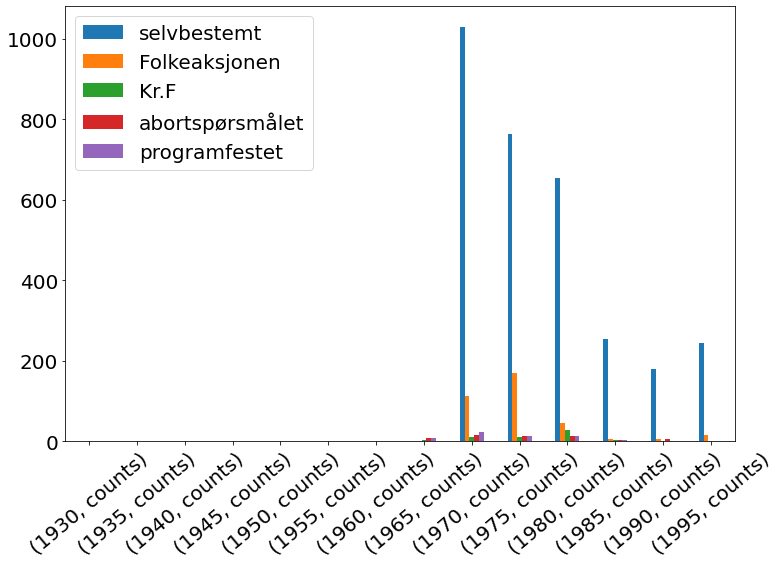

In [197]:
freq_assoc_val(colls[[(x,'counts') for x in collocations]], pmi_w, 10)

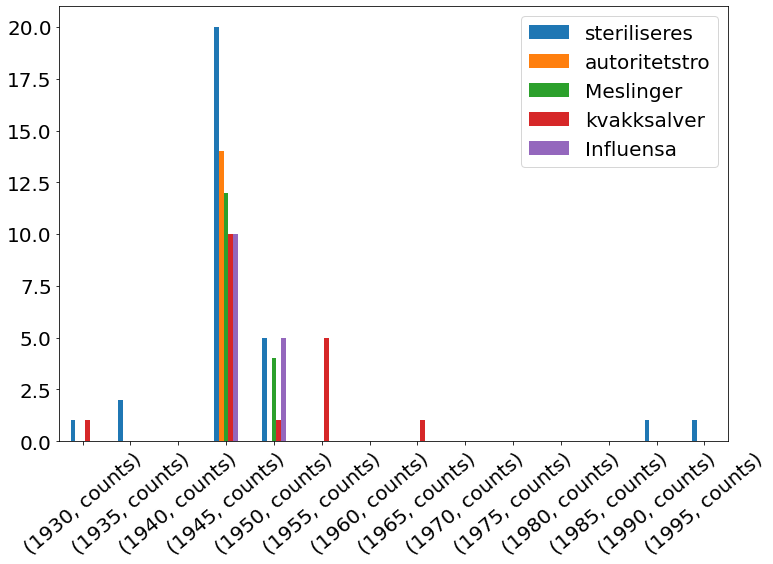

In [198]:
freq_assoc_val(colls[[(x,'counts') for x in collocations]], pmi_w, 3)

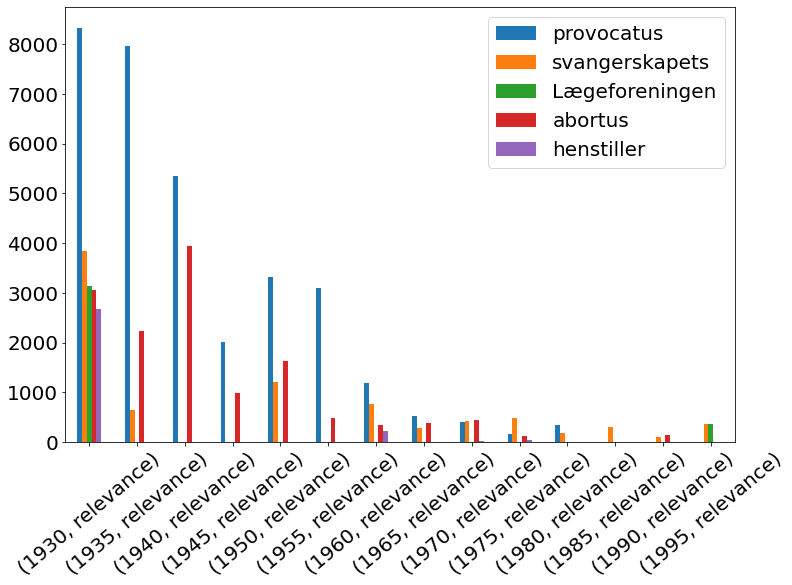

In [200]:
freq_assoc_val(colls[[(x,'relevance') for x in collocations]], pmi_w, 0)

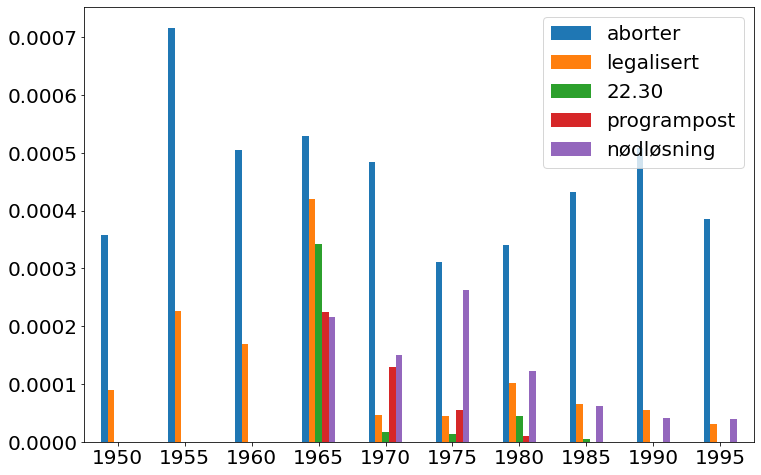

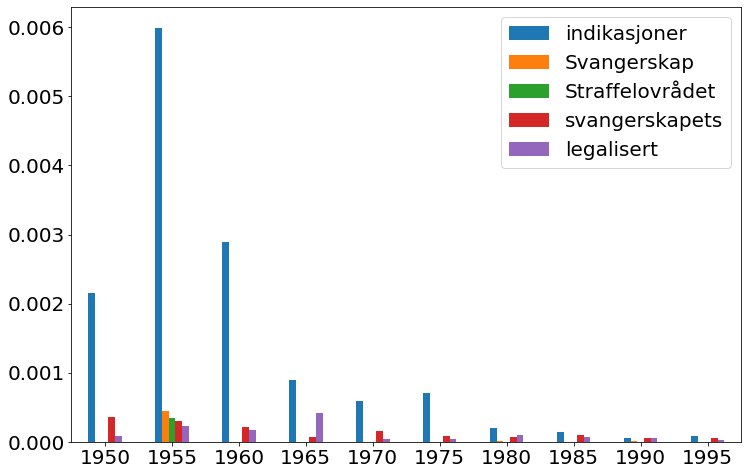

In [140]:
freq_assoc_val(, 1)

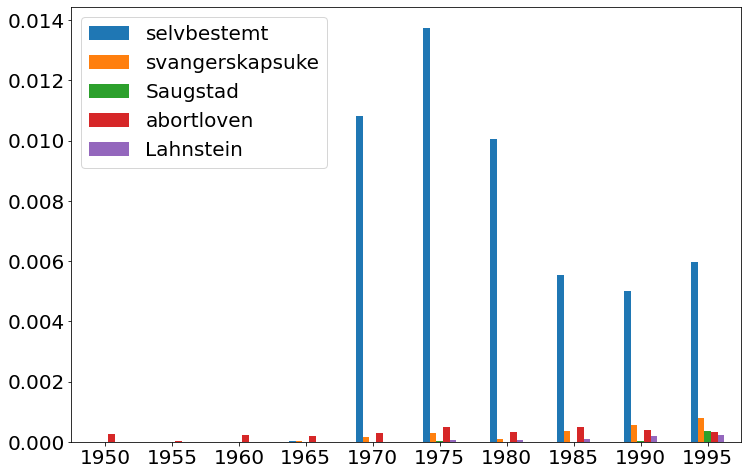

In [143]:
freq_assoc_val(agg, pmi, 9)

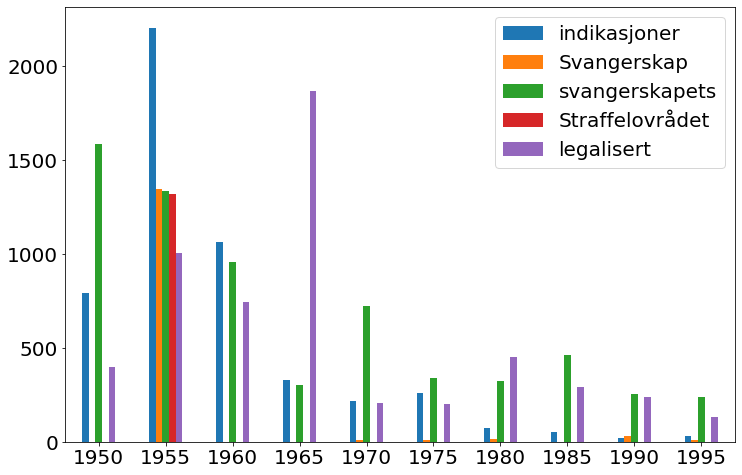

In [144]:
freq_assoc_val(pmi, pmi, 1)

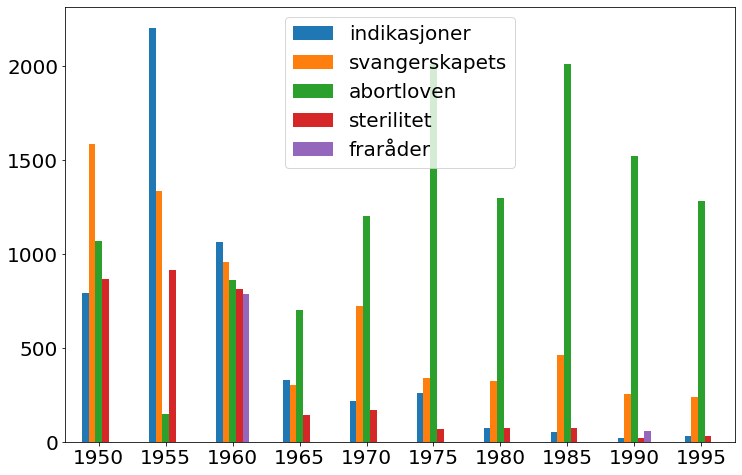

In [145]:
freq_assoc_val(pmi, pmi, 2)

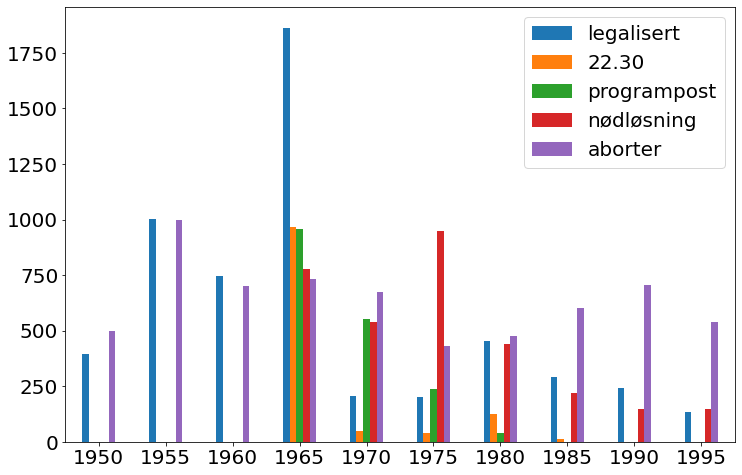

In [146]:
freq_assoc_val(pmi, pmi, 3)

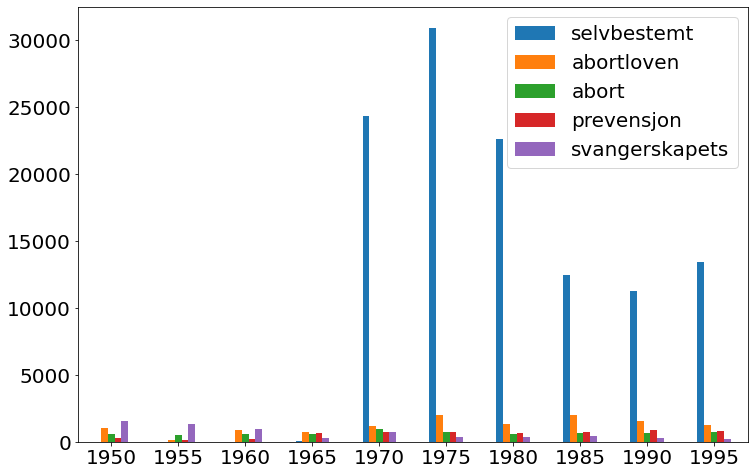

In [147]:
freq_assoc_val(pmi, pmi, 4)

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [67]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
Folkeaksjonen, Selvbestemt, Øog, Kvinnefronten, Kvinneaksjonen, Sjølbestemt, Hauglin, Abort, Tungesvik, Folkepartis, SVs, Opplysningsutvalget, Kr.F, Korvald, 13.45, Valgforbund, Senterpartiets, 19.15, Provosert, Aksjonen, Folkepartiet, Dagsnytt, Kvinnefrontens, Brekken, Svindland, Folkeaksjon, Programledere, Unneberg, Benkow, NTB-Reuter, Prevensjon, Fjose, 19.30, Hoyre, Aksjon, Blegen, Senterungdommen, RADIO

## adj
<span style='font-size:1.1em'>selvbestemt, sjølbestemt, abortsøkende, ufødte</span>
## verb
<span style='font-size:1.1em'>aborter, programfestet, innvilges, innvilge, programfeste, framkalt, legalisere</span>
## unknown
<span style='font-size:1.1em'>sjølvbestemt, sjølvvald, prevensjonsveiledning, abortspørsmålet, svangerskapsavbrytelse, soke, abortsaken, fosterets, svangerskapets, svangerskapsuke, sjolbestemt, sjølvald, stortingsperiode, soker, sporsmålet, soknader, abortdebatten, abortinngrep, abortlovgivningen, utfore, provocatus, sokte, sporsmål, sterilisering, kvinnerett, losning, reservasjonsrett, abortus, abortnemnda, sjolvvald</span>
## subst
<span style='font-size:1.1em'>abortlov, abortloven, folkeaksjonen, prevensjonsmiddel, daghjem, nødløsning, pornografi, kvinnesak, menneskeverdet, prevensjonsmidler, programpost, svangerskapsavbrudd, underskrifter, programposten, seksualopplysning, folkeaksjon, fosterdrap, porno, forkjemperne, sterilitet, familieplanlegging</span>


# Hvordan utvikler ordene seg?

In [201]:
barchart = lambda w, title='', df=pmi_w: df.loc[[ws for ws in w if ws in df.index]].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

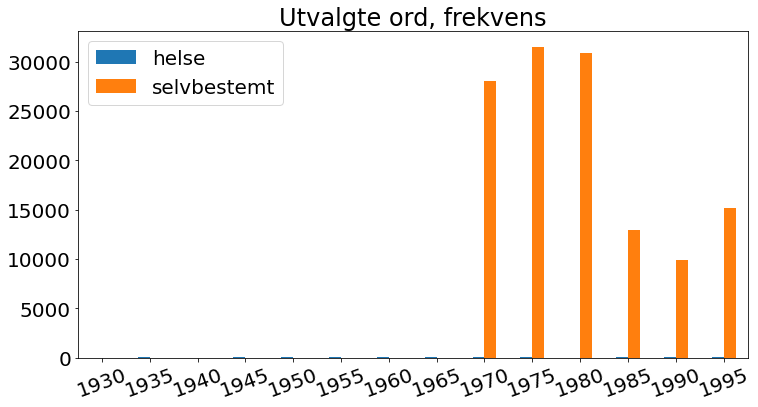

In [204]:
barchart(['helse','selvbestemt'], 'Utvalgte ord, frekvens', df=pmi_w);

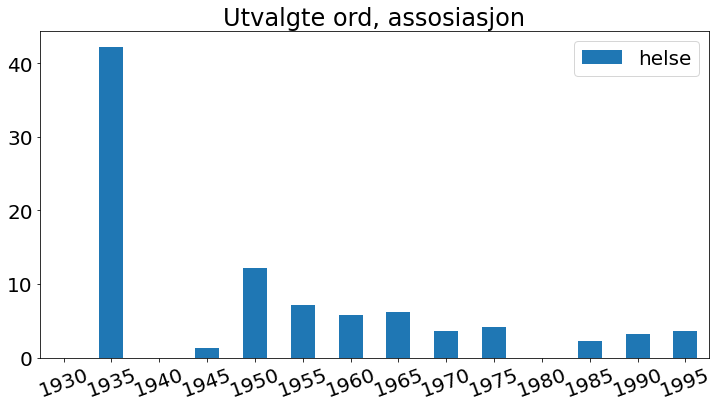

In [205]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

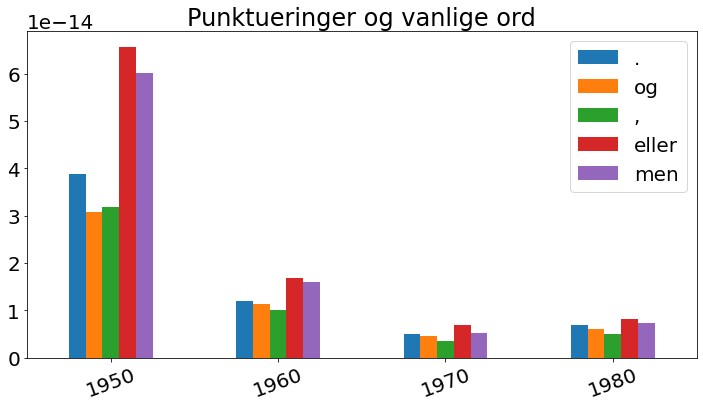

In [75]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

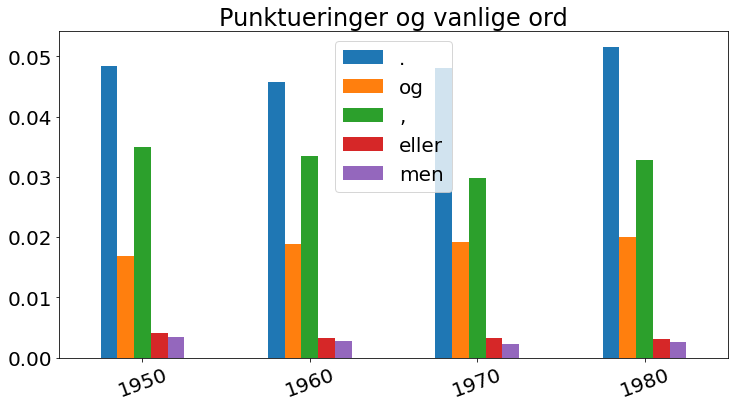

In [76]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [77]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

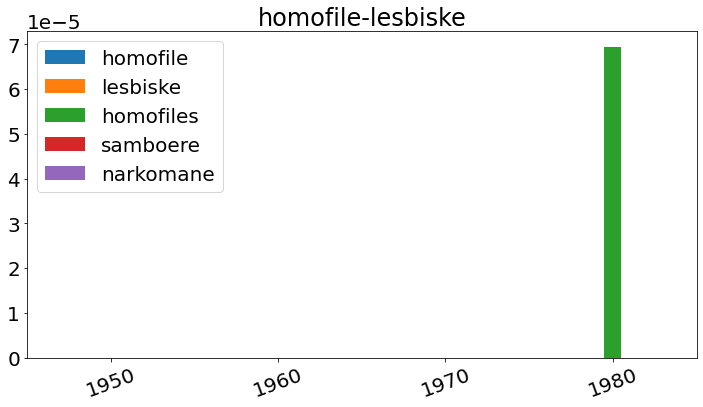

In [78]:
commchart(2, (0,5));

<AxesSubplot:title={'center':'prevensjon-familieplanlegging'}>

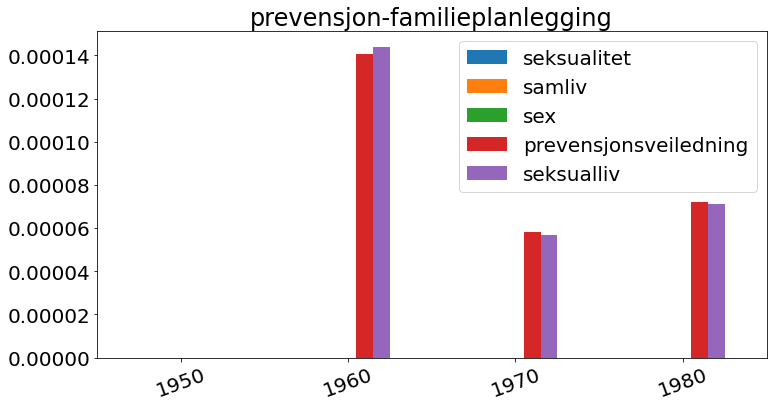

In [79]:
commchart(1, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

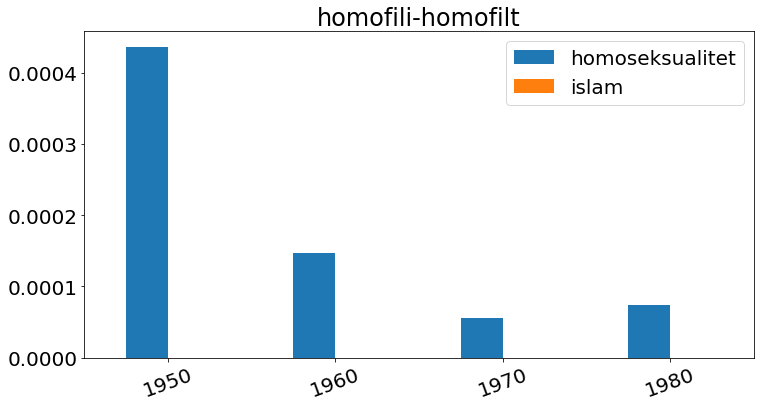

In [81]:
commchart(3, (3, 8))

<AxesSubplot:title={'center':'homofili-homofilt'}>

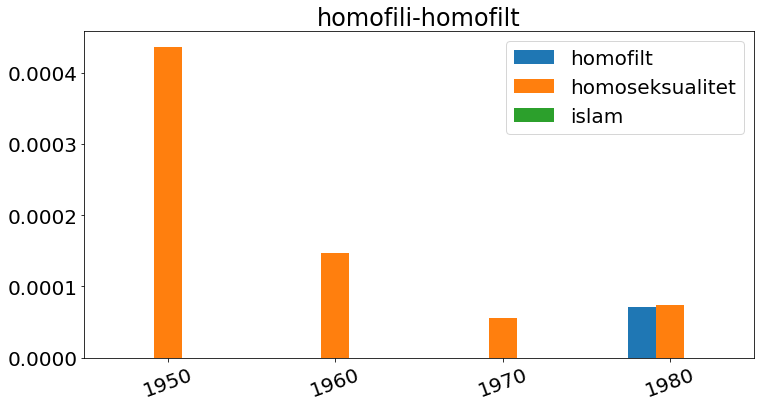

In [80]:
commchart(3)